Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading dataset

In [2]:
# Step 1: Data Reading/Data Understanding
train_dir = "C:/Users/Dell/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir = "C:/Users/Dell/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

### Creating the dataset

In [3]:
# Define parameters
batch_size = 32
img_height = 180
img_width = 180
seed = 123

In [4]:
# Create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [5]:
# Create the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [6]:
# List out all the classes of skin cancer and store them in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualising the dataset

#### visualize one instance of all the nine classes present in the dataset

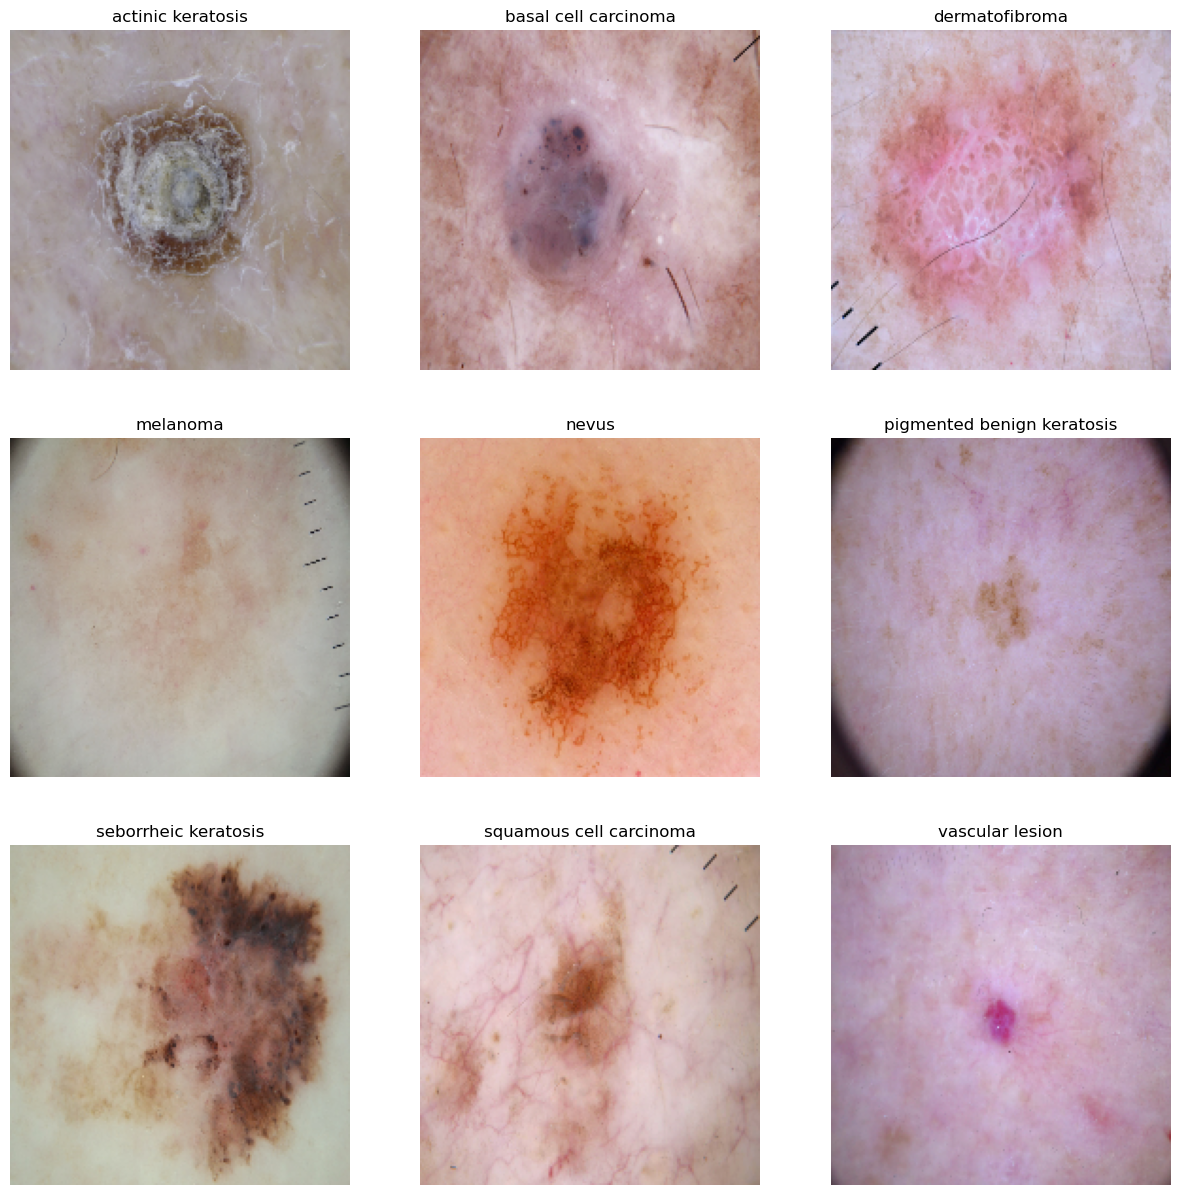

In [7]:
#import matplotlib.image as mpimg

# Step 3: Dataset Visualization
# Optimize the dataset loading
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Function to visualize one instance of each class
def visualize_classes(dataset, class_names):
    plt.figure(figsize=(15, 15))
    for images, labels in dataset.take(1):
        for i in range(len(class_names)):
            ax = plt.subplot(3, 3, i + 1)
            idx = np.where(labels == i)[0][0]
            plt.imshow(images[idx].numpy().astype("uint8"))
            plt.title(class_names[i])
            plt.axis("off")
    plt.show()

# Visualize the classes
visualize_classes(train_ds, class_names)

### Model Building & Training

In [8]:
# Step 4: Model Building & Training
import tensorflow as tf

# Define the CNN model
model = tf.keras.Sequential([
    # Normalization layer
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten layer
    tf.keras.layers.Flatten(),
    
    # Dense (fully connected) layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Output layer
    tf.keras.layers.Dense(9, activation='softmax')  # Assuming 9 classes for melanoma detection
])


# View the summary of all layers
model.summary()


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,655,817 (25.39 MB)

 Trainable params: 6,655,817 (25.39 MB)

 Non-trainable params: 0 (0.00 B)

### Compile The model

In [9]:
# Compile the model
model.compile(optimizer='adam',  # You can choose other optimizers like 'sgd' or 'rmsprop'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Use from_logits=True if you remove activation='softmax' from the output layer
              metrics=['accuracy'])


### Train the model

In [10]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 472ms/step - accuracy: 0.1994 - loss: 2.0984 - val_accuracy: 0.3400 - val_loss: 1.8859
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 477ms/step - accuracy: 0.3439 - loss: 1.8107 - val_accuracy: 0.4922 - val_loss: 1.5325
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 477ms/step - accuracy: 0.4321 - loss: 1.6008 - val_accuracy: 0.4944 - val_loss: 1.4680
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 498ms/step - accuracy: 0.4779 - loss: 1.4530 - val_accuracy: 0.4989 - val_loss: 1.4383
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 481ms/step - accuracy: 0.5366 - loss: 1.3429 - val_accuracy: 0.5324 - val_loss: 1.4318
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 485ms/step - accuracy: 0.5309 - loss: 1.2940 - val_accuracy: 0.5324 - val_loss: 1.3538
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 484ms/step - accuracy: 0.5708 - loss: 1.2213 - val_accuracy: 0.4832 - val_loss: 1.5053
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 484ms/step - accuracy: 0.5688 - loss: 1.1769 - val_accu

### Visualizing training results

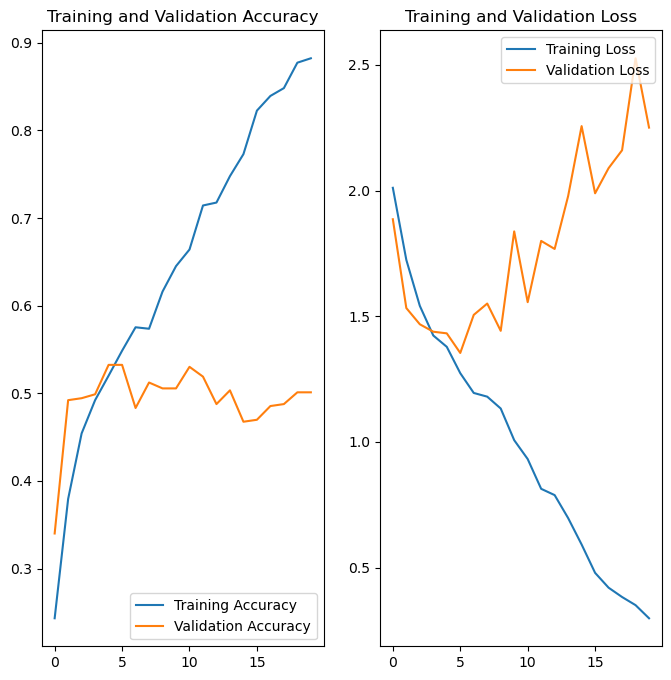

In [11]:
# Plot training results 
epochs=20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### We can see here with the increasing epoch, the training accuracy is continuously increasing, however the validation accuracy is still low.
#### Also, we can see that with the increasing epoch, the training accuracy is continuously decreasing, however the validation accuracy is increasing.
#### This shows that the model is overfitting

### Data Augumentation for overfitting data

In [12]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

### visualize how augmentation strategy works for one instance of training image

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


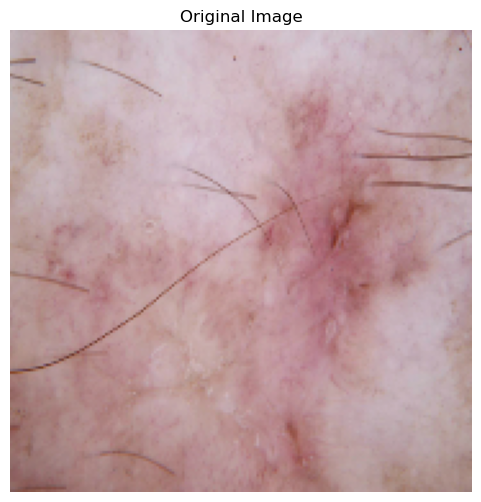

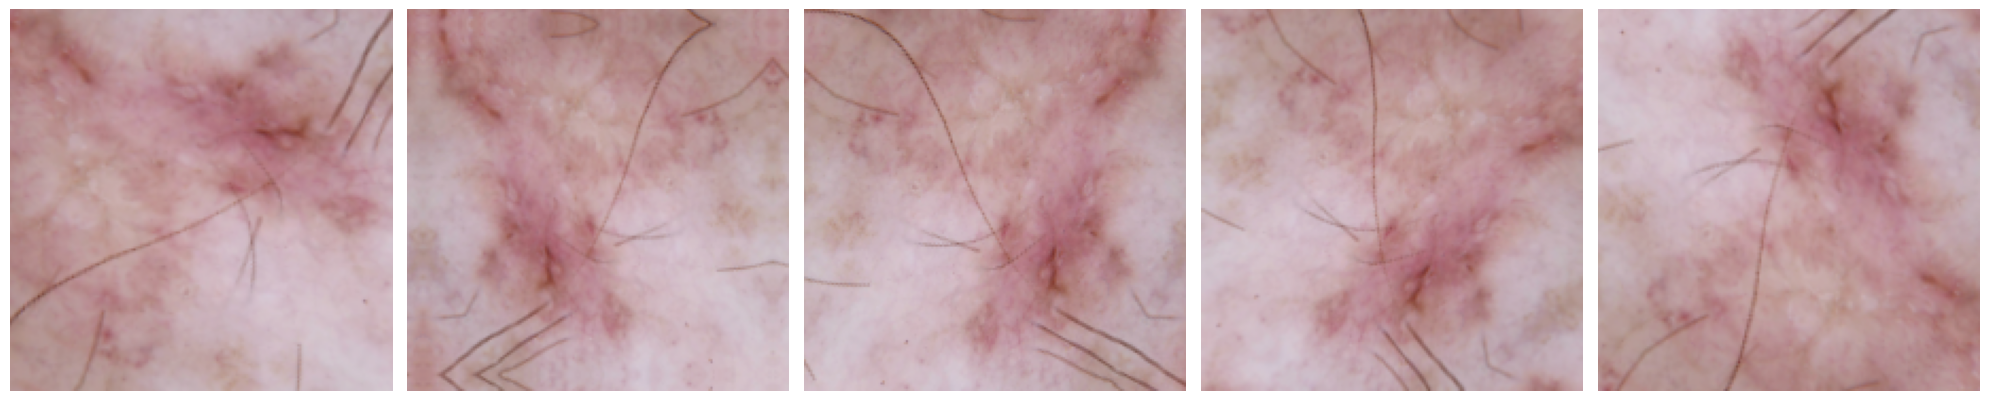

In [13]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Create a dataset for one image
sample_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1
)

# Get one batch (one image)
for images, labels in sample_dataset.take(1):
    sample_image = images[0].numpy().astype("uint8")
    break

# Plot the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(sample_image)
plt.axis("off")
plt.show()

# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Apply data augmentation and visualize
augmented_images = [data_augmentation(sample_image[np.newaxis, ...]) for _ in range(5)]
augmented_images = [img[0].numpy().astype("uint8") for img in augmented_images]

# Plot augmented images
plot_images(augmented_images)

### Model Building & Training on Augmented Data

In [14]:
# Step 6: Model Building & Training on Augmented Data
model_aug = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,967,453 (76.17 MB)

 Trainable params: 6,655,817 (25.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,311,636 (50.78 MB)

### Compile the model

In [15]:
#Compile the model
model_aug.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

### Train the model with augmented data

In [16]:
# Train the model with augmented data
history_aug = model_aug.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 573ms/step - accuracy: 0.2071 - loss: 2.1308 - val_accuracy: 0.2617 - val_loss: 1.9427
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 549ms/step - accuracy: 0.2839 - loss: 1.8835 - val_accuracy: 0.3468 - val_loss: 1.7474
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 531ms/step - accuracy: 0.3624 - loss: 1.7352 - val_accuracy: 0.3602 - val_loss: 1.8239
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 543ms/step - accuracy: 0.4258 - loss: 1.6146 - val_accuracy: 0.4698 - val_loss: 1.5691
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 537ms/step - accuracy: 0.4575 - loss: 1.5273 - val_accuracy: 0.5056 - val_loss: 1.4712
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 534ms/step - accuracy: 0.4893 - loss: 1.4197 - val_accuracy: 0.4698 - val_loss: 1.5509
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 529ms/step - accuracy: 0.4854 - loss: 1.4397 - val_accuracy: 0.4966 - val_loss: 1.3960
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 530ms/step - accuracy: 0.5024 - loss: 1.3697 - val_accu

### Visualisation of Training and Validation Accuracy (Augmented)

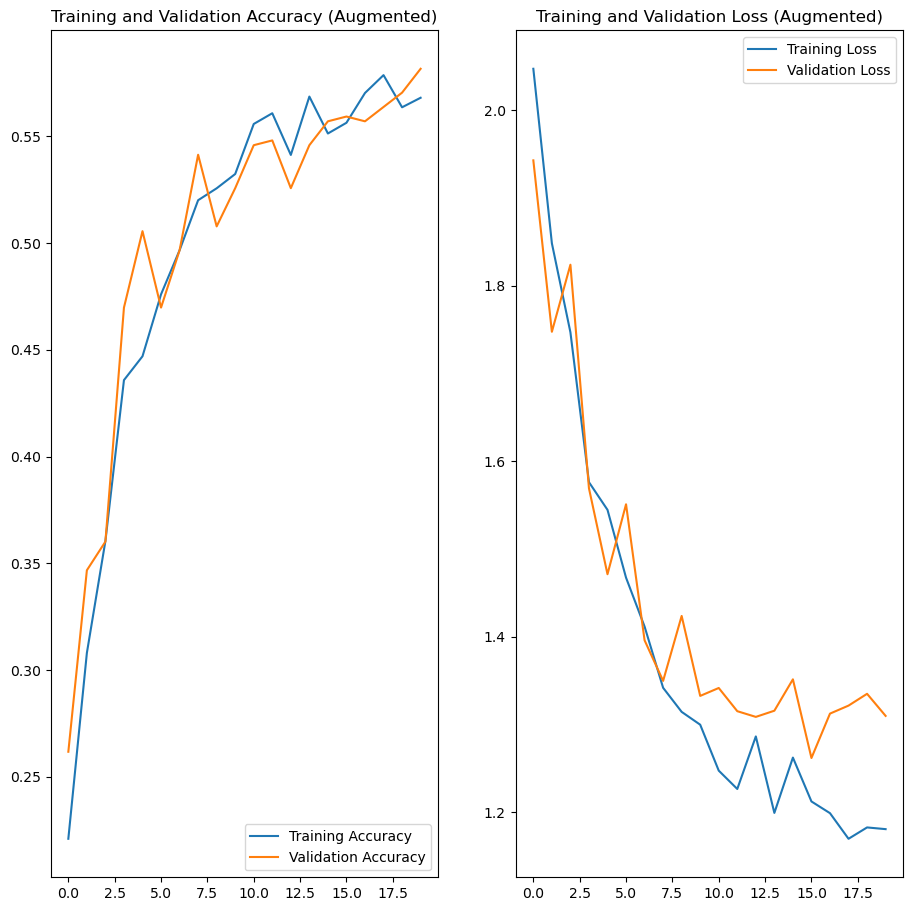

In [17]:
epochs=20
epochs_range = range(epochs)
acc_aug = history_aug.history['accuracy']
val_acc_aug = history_aug.history['val_accuracy']
loss_aug = history_aug.history['loss']
val_loss_aug = history_aug.history['val_loss']

plt.figure(figsize=(11, 11))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_aug, label='Training Accuracy')
plt.plot(epochs_range, val_acc_aug, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Augmented)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_aug, label='Training Loss')
plt.plot(epochs_range, val_loss_aug, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Augmented)')
plt.show()

## Overfitting has reduced but the accuracy of model can be improved more

In [18]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(train_dir, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(train_dir, '*', '*.jpg'))]
len(path_list)

2239

In [19]:
import pandas as pd
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,actinic keratosis
1,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,actinic keratosis
2,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,actinic keratosis
3,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,actinic keratosis
4,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2234,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,vascular lesion
2235,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,vascular lesion
2236,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,vascular lesion
2237,C:/Users/Dell/Downloads/Skin cancer ISIC The I...,vascular lesion


Class Distribution:
actinic keratosis: 114 samples
basal cell carcinoma: 376 samples
dermatofibroma: 95 samples
melanoma: 438 samples
nevus: 357 samples
pigmented benign keratosis: 462 samples
seborrheic keratosis: 77 samples
squamous cell carcinoma: 181 samples
vascular lesion: 139 samples


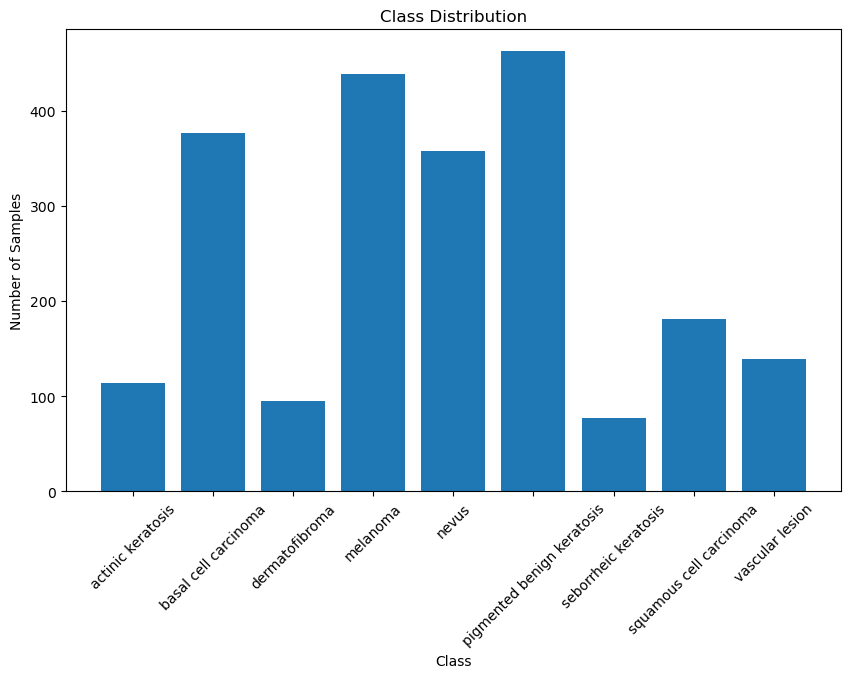

In [20]:
# Step 7: Class Distribution Analysis
def class_distribution_analysis(dataset_dir):
    classes = os.listdir(dataset_dir)
    class_counts = {}

    # Count number of samples for each class
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        num_samples = len(os.listdir(class_dir))
        class_counts[class_name] = num_samples

    # Print class distribution
    print("Class Distribution:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} samples")

    # Plot class distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.show()

# Analyze class distribution in the training dataset
class_distribution_analysis(train_dir)

### seborrheic keratosis: 77 samples is the least number of samples
### Classes which dominate are:
### pigmented benign keratosis: 462 samples
### melanoma: 438 samples
### basal cell carcinoma: 376 samples
### nevus: 357 samples

In [21]:
# Install Augmentor
!pip install Augmentor  

In [22]:
import Augmentor
import os

# Define the base path to the training dataset
path_to_training_dataset = "C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# List of class names (replace this with your actual class names)
class_names = ["actinic keratosis", "basal cell carcinoma", "dermatofibroma", "melanoma", "nevus", "pigmented benign keratosis", "seborrheic keratosis", "squamous cell carcinoma", "vascular lesion"]  # Example class names

# Loop through each class and create an augmentation pipeline
for class_name in class_names:
    # Construct the full path to the class directory
    class_dir = os.path.join(path_to_training_dataset, class_name)
    
    # Check if the class directory exists
    if not os.path.exists(class_dir):
        print(f"Directory does not exist: {class_dir}")
        continue
    
    # Initialize the Augmentor pipeline
    p = Augmentor.Pipeline(class_dir)
    
    # Add augmentation operations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # Sample 500 augmented images per class
    p.sample(500)

    print(f"Augmentation completed for class: {class_name}")

Directory does not exist: C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\actinic keratosis
Directory does not exist: C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\basal cell carcinoma
Directory does not exist: C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\dermatofibroma
Directory does not exist: C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\melanoma
Directory does not exist: C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\nevus
Directory does not exist: C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\pigmented benign keratosis
Directory does not exist: C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International

In [23]:
from pathlib import Path

# Define the path to your training dataset directory
data_dir_train = "C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# Convert the directory path to a Path object
data_dir_train_path = Path(data_dir_train)

# Use the glob method to count the number of .jpg images
image_count_train = len(list(data_dir_train_path.glob('*/output/*.jpg')))

# Print the number of images
print(image_count_train)

0


In [24]:
import glob
import os

# Define the path to your training dataset directory
data_dir_train = "C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# Use glob to find all .jpg files in the specified pattern
path_list_new = glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))

# Print the list of file paths
print(path_list_new)

[]


In [25]:
import glob
import os

# Define the path to your training dataset directory
data_dir_train = "C:/Users/91997/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# Use glob to find all .jpg files in the specified pattern
image_paths = glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))

# Extract the lesion names from the file paths
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in image_paths]

# Print the list of lesion names
print(lesion_list_new)

[]


In [26]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [27]:
import pandas as pd
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17080\2518358092.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [28]:
new_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Todo: Train the model on the data created using Augmentor¶

In [29]:
batch_size = 32
img_height = 180
img_width = 180

In [30]:
# Create a training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [31]:
# Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [32]:
#Create your model (make sure to include normalization)
import tensorflow as tf
from tensorflow.keras import layers, Sequential

num_classes = 9

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
 layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Include input shape for the first layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Print the model summary
model.summary()

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile your model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
# Train your model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.1844 - loss: 2.4760 - val_accuracy: 0.2595 - val_loss: 1.9914
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.3216 - loss: 1.8660 - val_accuracy: 0.4541 - val_loss: 1.5667
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.4404 - loss: 1.5551 - val_accuracy: 0.4810 - val_loss: 1.4326
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.4960 - loss: 1.3964 - val_accuracy: 0.4855 - val_loss: 1.4292
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.5576 - loss: 1.2683 - val_accuracy: 0.5324 - val_loss: 1.4085
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.5795 - loss: 1.1635 - val_accuracy: 0.5347 - val_loss: 1.3761
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.6220 - loss: 1.0878 - val_accuracy: 0.5459 - val_loss: 1.3837
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.6285 - loss: 1.0544 - val_accu

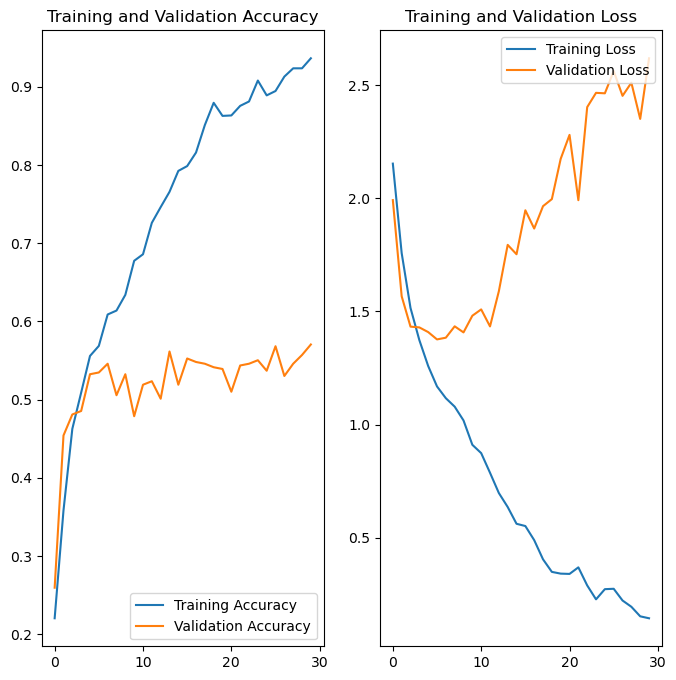

In [35]:
# Visualize the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()